In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes, TwoLocal
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA


In [24]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
import numpy as np

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
Y

array([[0],
       [1],
       [1],
       [0]])

In [5]:
MAXITR = 50
opt = COBYLA(maxiter=MAXITR)

In [6]:
num_qubits = X.shape[1]

In [9]:
featuremap = ZZFeatureMap(feature_dimension=num_qubits, parameter_prefix='x', reps=1)
ansatz = RealAmplitudes(num_qubits=num_qubits, reps=1)

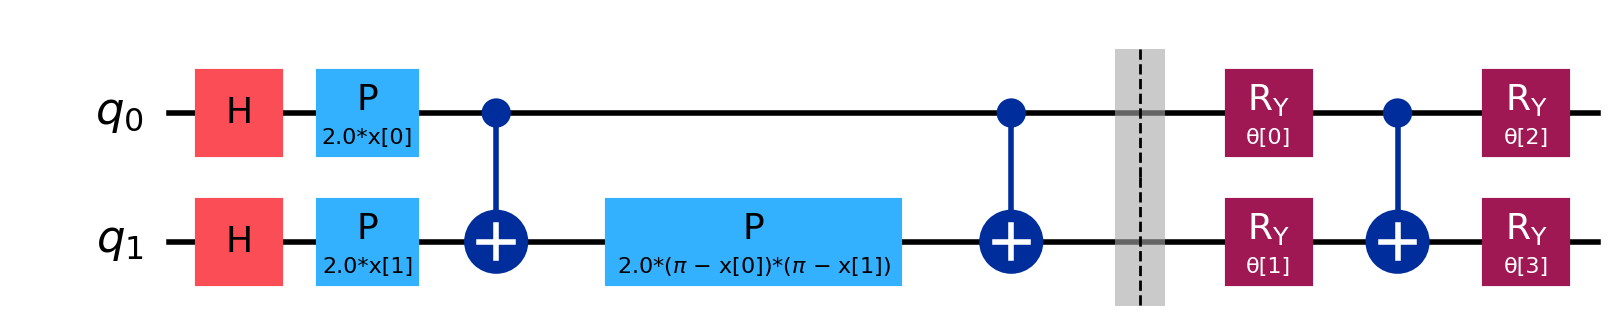

In [10]:
qc = QuantumCircuit(num_qubits)
qc.compose(featuremap, inplace=True)
qc.barrier()
qc.compose(ansatz, inplace=True)
qc.decompose().draw(output='mpl', style='iqx', scale=2)

In [26]:
objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [14]:
seed = algorithm_globals.random_seed
initial_weights = algorithm_globals.random.random(ansatz.num_parameters)

/tmp/ipykernel_7645/3680567682.py:1: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random_seed`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  seed = algorithm_globals.random_seed
/tmp/ipykernel_7645/3680567682.py:2: DeprecationWarning: The property ``qiskit.utils.algorithm_globals.QiskitAlgorithmGlobals.random`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. This algorithm utility has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. You can run ``pip install qiskit_algorithms`` and import ``from qiskit_algorithms.utils`` instead. 
  initial_weights = algorithm_glob

In [28]:
vqc = VQC(
    optimizer=opt,
    ansatz=ansatz,
    feature_map=featuremap,
    initial_point=initial_weights,
    callback=callback_graph,
    loss='cross_entropy'
)

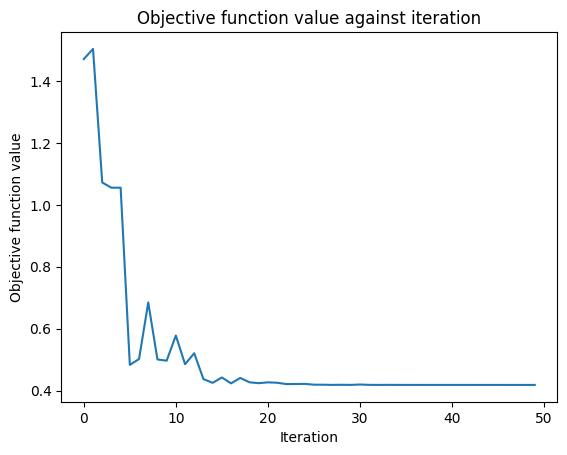

In [29]:
vqc.fit(X, Y)

In [30]:
vqc.score(X, Y)

1.0